In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
%matplotlib inline
#%matplotlib notebook
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('../data/df.csv')

In [3]:
target = data['Result']

In [4]:
data = data.drop('Result', axis=1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    data, target, stratify=target, random_state=66)

## KNeighborsClassifier ##

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,11)

In [8]:
for n_neighbors in neighbors_settings:
    # モデルの構築
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 訓練セット精度を記録
    training_accuracy.append(clf.score(X_train, y_train))
    # 汎化精度を記録
    test_accuracy.append(clf.score(X_test, y_test))

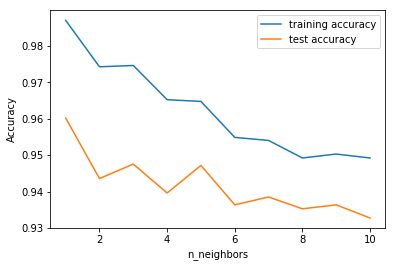

In [9]:
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

## 線形回帰( 通常最小二乗法) ##

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lr = LinearRegression().fit(X_train, y_train)

/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [12]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [ 0.0857762  -0.02718533 -0.12593654  0.05572291  0.06461886  0.1112796
  0.08480269  0.42193457 -0.01390779 -0.01419499  0.05878497 -0.037613
  0.05515054  0.48477074  0.1256426   0.13061001 -0.03795554 -0.04845617
 -0.15480857  0.03179954  0.01075033 -0.01745322 -0.04830481  0.00561585
  0.05448731  0.10876081  0.0433579   0.09612232  0.11292359  0.06006482]
lr.intercept_: 0.06326592504198844


In [13]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.70
Test set score: 0.70


## リッジ回帰 ##

In [14]:
from sklearn.linear_model import Ridge

In [15]:
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.70
Test set score: 0.70


In [16]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.70
Test set score: 0.70


In [17]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.70
Test set score: 0.70


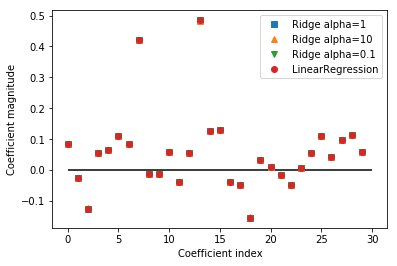

In [18]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.legend()

## Lasso ##

In [19]:
from sklearn.linear_model import Lasso

In [20]:
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.00
Test set score: -0.00
Number of features used: 0


In [21]:
# 適合不足を解消するためalphaを減らす
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of featres used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.70
Test set score: 0.69
Number of featres used: 18


In [22]:
# 適合不足を解消するためalphaを減らす
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of featres used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.70
Test set score: 0.70
Number of featres used: 30


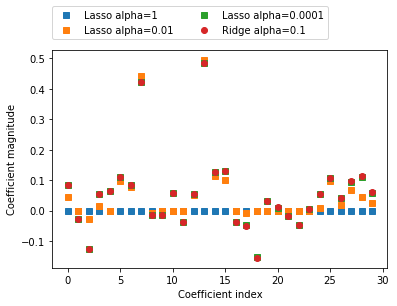

In [23]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, 's', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 's', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

## ロジスティック回帰 ##

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score:{:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score:0.928
Test set score: 0.932


In [26]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score:{:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score:0.928
Test set score: 0.932


In [27]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score:{:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score:0.925
Test set score: 0.928


In [28]:
data.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report'],
      dtype='object')

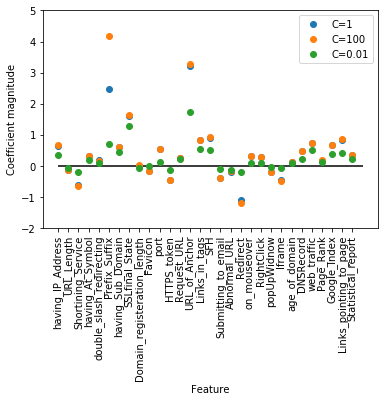

In [29]:
plt.plot(logreg.coef_.T, 'o', label='C=1')
plt.plot(logreg100.coef_.T, 'o', label='C=100')
plt.plot(logreg001.coef_.T, 'o', label='C=0.01')
plt.xticks(range(data.shape[1]), data.columns, rotation=90)
plt.hlines(0, 0, data.shape[1])
plt.ylim(-2, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

Training accuracy of l1 logreg with C=0.001: 0.89
Test accuracy of l1 logreg with C=0.001: 0.89
Training accuracy of l1 logreg with C=1.000: 0.93
Test accuracy of l1 logreg with C=1.000: 0.93
Training accuracy of l1 logreg with C=100.000: 0.93
Test accuracy of l1 logreg with C=100.000: 0.93


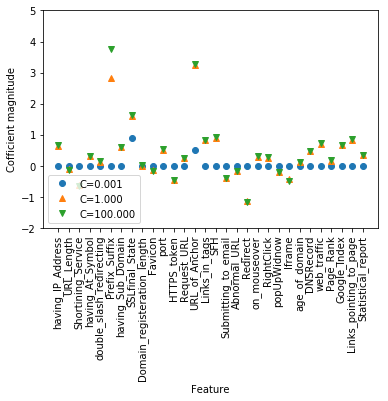

In [30]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
plt.xticks(range(data.shape[1]), data.columns, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Cofficient magnitude")
plt.ylim(-2, 5)
plt.legend(loc=3)

## 決定木 ##

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
tree = DecisionTreeClassifier(random_state=0)

In [33]:
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.990
Accuracy on test set: 0.966


In [34]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.918
Accuracy on test set: 0.916


In [35]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["normal", "phishing"],
               feature_names=data.columns, impurity=False, filled=True)

In [36]:
import graphviz

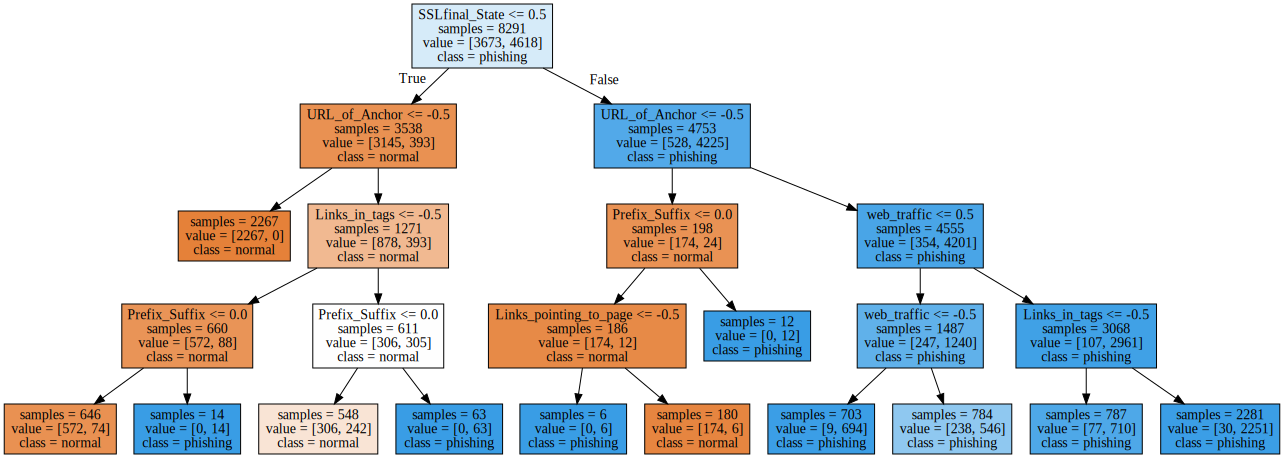

In [37]:
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [38]:
# 特徴量の重要度
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[ 0.          0.          0.          0.          0.          0.02441572
  0.          0.78377814  0.          0.          0.          0.          0.
  0.12750516  0.02980372  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.03103176
  0.          0.          0.0034655   0.        ]


In [39]:
# 特徴量の重要度をグラフ化する関数
def plot_feature_importances_phishing(model):
    n_features = data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), data.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

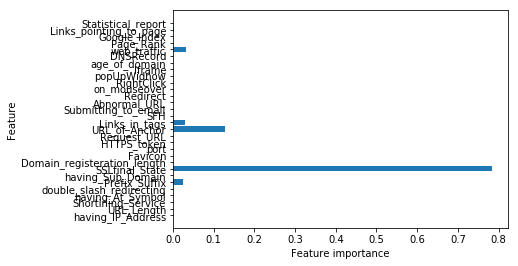

In [40]:
plot_feature_importances_phishing(tree)

## ランダムフォレスト ##

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
# n_estimatorsでデータの個数を決める
forest = RandomForestClassifier(n_estimators=1000, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.990
Accuracy on test set: 0.972


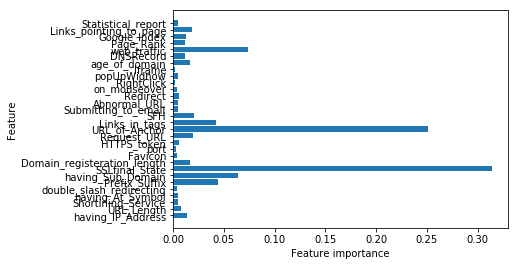

In [43]:
plot_feature_importances_phishing(forest)

## 勾配ブースティング回帰木 ##

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

In [45]:
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.955
Accuracy on test set: 0.947


In [46]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.928
Accuracy on test set: 0.927


In [47]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=1.4)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.984
Accuracy on test set: 0.967


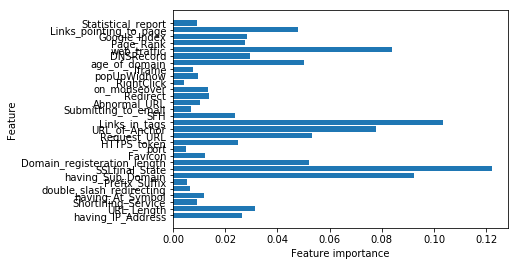

In [48]:
plot_feature_importances_phishing(gbrt)

## ニューラルネットワーク (ディープラーニング) ##

In [49]:
from sklearn.neural_network import MLPClassifier

In [50]:
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
print("Acccuary on training set : {:.2f}".format(mlp.score(X_train, y_train)))
print("Accucary on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Acccuary on training set : 0.98
Accucary on test set: 0.97


In [51]:
#ニューラルネットワークは平均が0分散が1であるのが理想的.
#  訓練セットの特徴量ごとの平均値を算出
mean_on_train = X_train.mean(axis=0)
# 訓練セットの特徴量ごとの標準偏差を算出
std_on_train = X_train.std(axis=0)

# 平均を引き、標準偏差の逆数でスケール変換する
# これでmean=0, std=1 になる
X_train_scaled = (X_train - mean_on_train) / std_on_train
# まったく同じ変換(訓練データの平均と標準偏差を使って)をテストセットに施す
X_test_scaled = (X_test - mean_on_train) / std_on_train
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.986
Accuracy on test set: 0.972


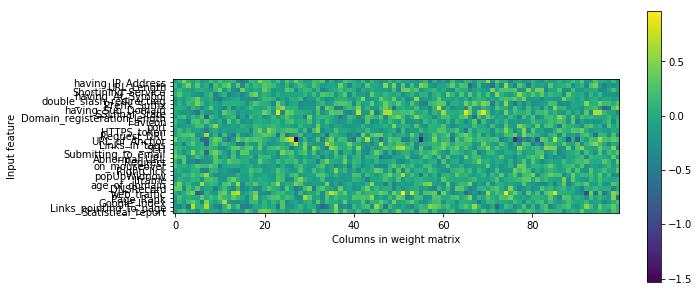

In [52]:
plt.figure(figsize=(10,5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(data.shape[1]), data.columns)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()